Redes

In [ ]:
from keras import models
from keras import layers
def define_model (len_ts,
                  hidden_neurons = 3,
                  nfeature=1,
                  batch_size=None,
                  stateful=False):
    in_out_neurons=1

    inp = layers.Input(batch_shape=(batch_size, len_ts, nfeature),
                     name='input')
    # cambio a RNN
    rnn = layers.SimpleRNN(hidden_neurons, 
                           return_sequences=False,
                           stateful=stateful,
                           unroll=True,
                           name='RNN')(inp)
                           
    dens = layers.Dense(in_out_neurons,name='dense')(rnn)
    model_complete = models.Model(inputs=[inp],outputs=[dens])
    model_hidden = models.Model(inputs=[inp], outputs=[rnn])

    model_complete.compile(loss='mean_squared_error',
                           optimizer='adam')
    return (model_complete, model_hidden)    

Ponemos segmentos de un atractor extranio en la red recurrente y nos fijamos como lo procesa esa red recurrente. 

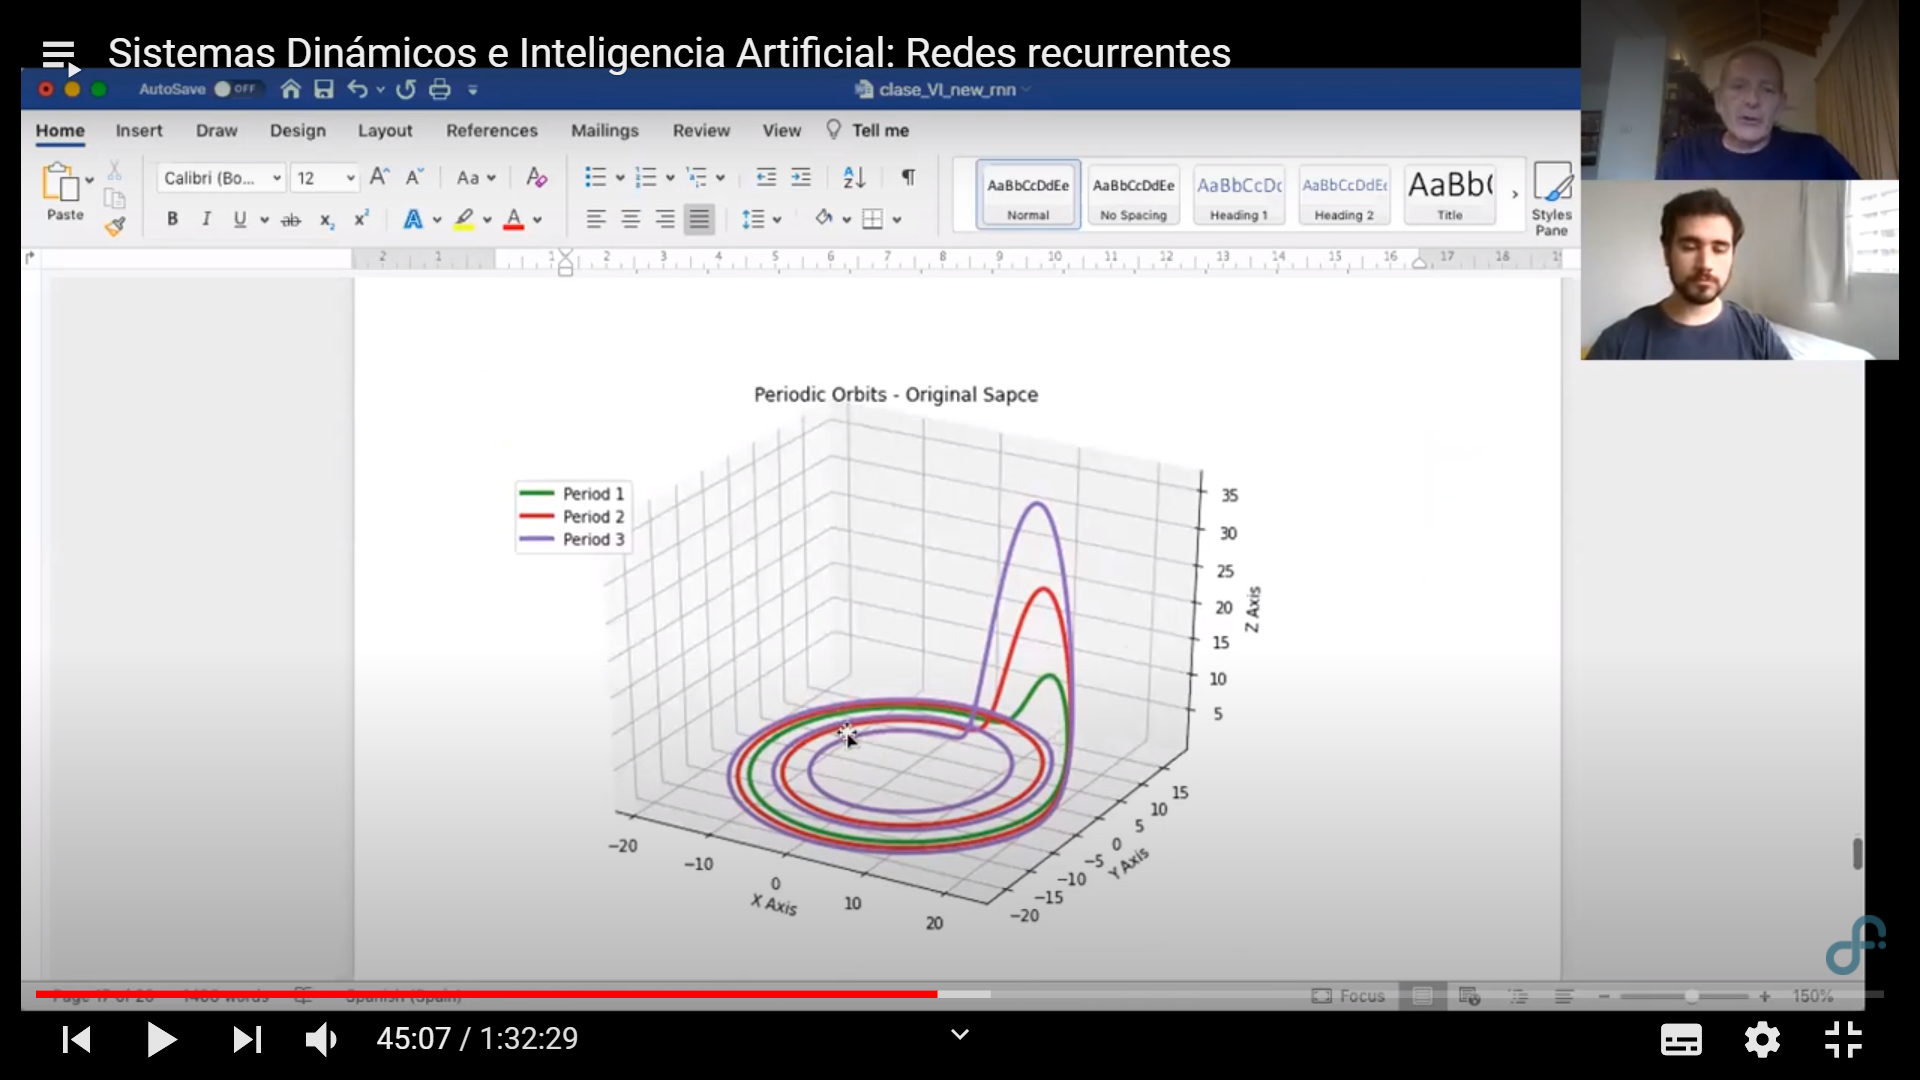

En el espacio latente (en el espacio de pocas unidades recurrentes, ver imagen abajo) yo obtengo una representacion que es un embedding. Cada vez que entreno una red que es capaz de llevar a cabo una prediccion, tiene escondido un embedding. 

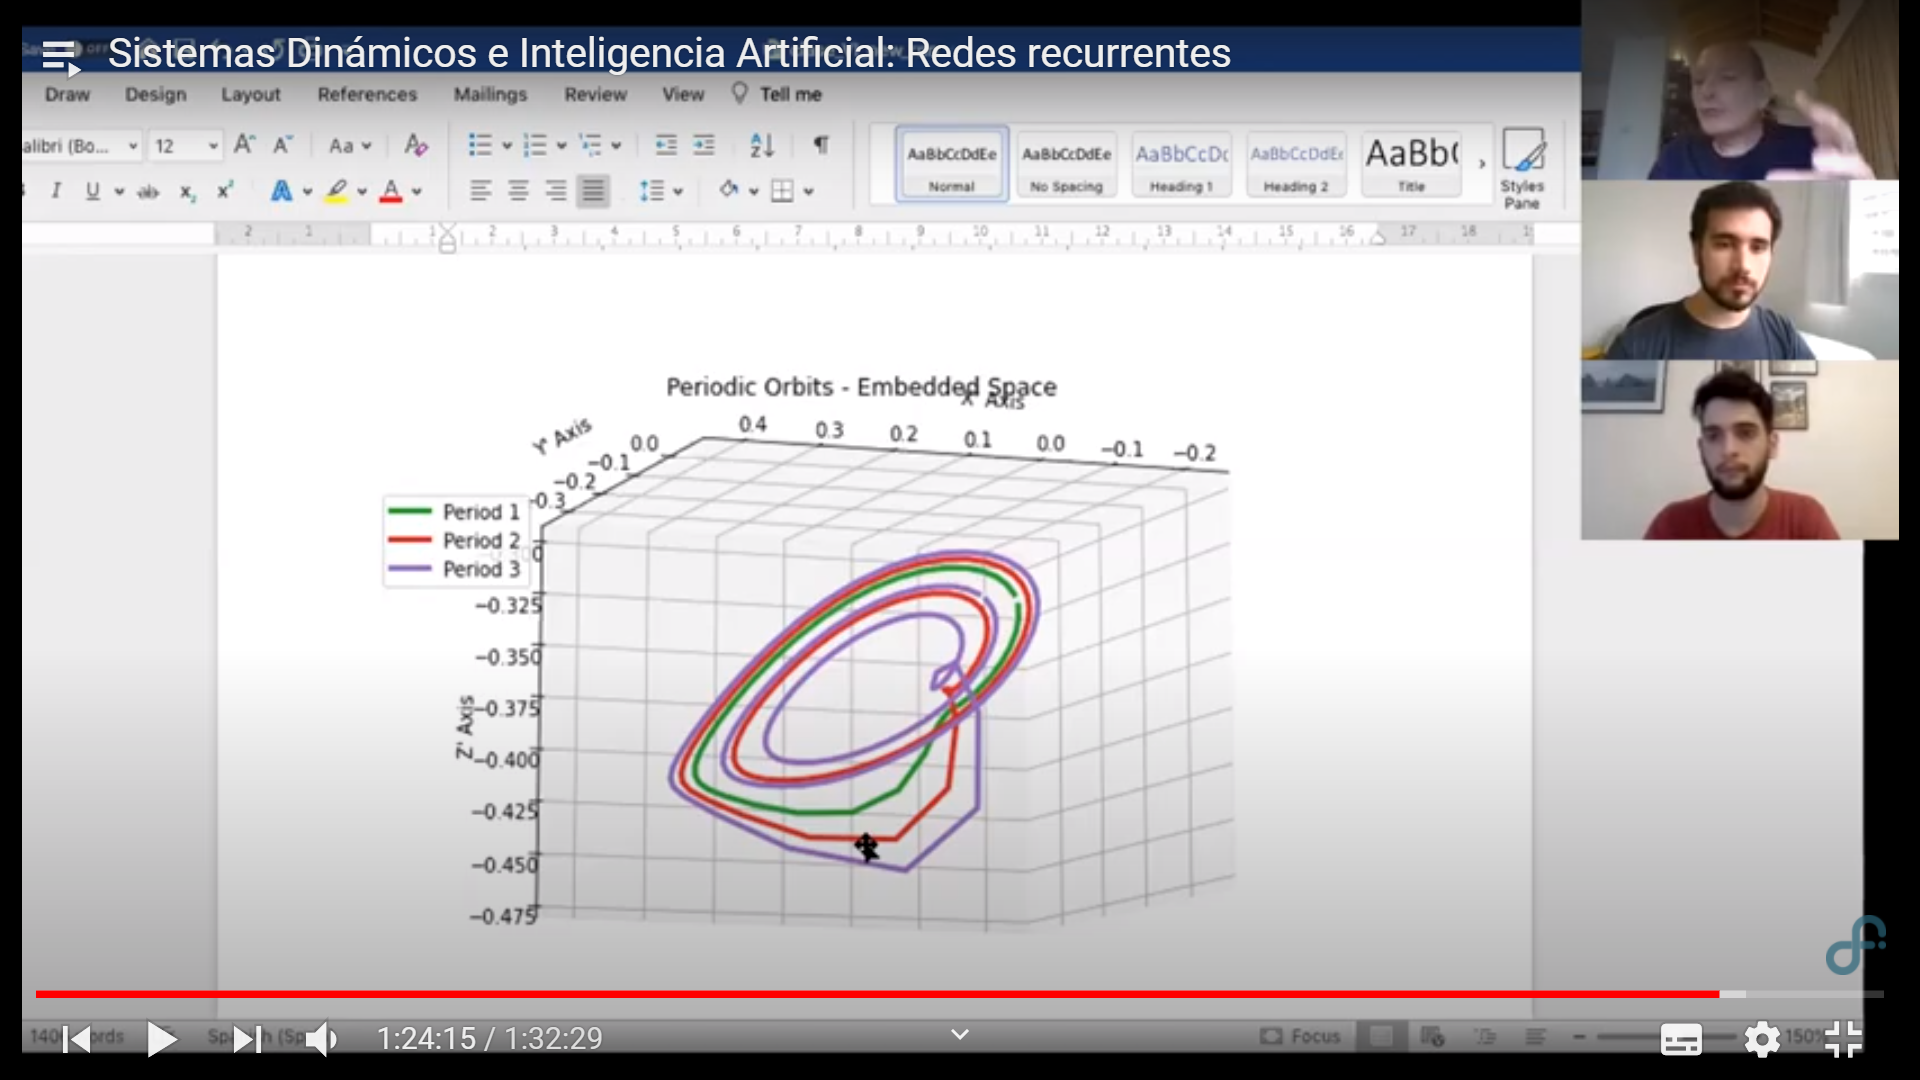

El espacio embebido se corresponde a 3 unidades de procesamiento de esa red recurrente cuyo espacio de fases original es el que vimos antes. Esto es una inspeccion de esas 3 unidades acomodadas en una especie de espacio de fases y mostrado para ilustrar que son topologicamente equivalentes. 